In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [135]:
# start with a simple polygon
poly = np.array([[-0.5, -0.5],
                 [0.0,  0.5],
                 [0.5, -0.5],
                 [-0.5, -0.5]])  # overlap for convenience

In [136]:
def winding(poly, points):
    num_verts = poly.shape[0]
    num_points = points.shape[0]
    diffs = poly.reshape((num_verts, 1, 2)) - points.reshape((1, num_points, 2))
    diffs /= np.sqrt(np.sum(diffs**2, axis=2, keepdims=True))
    cos_angles = np.sum(diffs[:-1, :, :] * diffs[1:, :, :], axis=2)
    angles = np.arccos(cos_angles)
    return np.sum(angles, axis=0) / (2.0 * np.pi)

In [137]:
test = np.array([[0.1, 0.0],
                 [0.0, 0.499],
                 [1.0, 0.0]])

In [138]:
winding(poly, test)

array([ 1.        ,  1.        ,  0.39758362])

In [139]:
coords = np.linspace(-1.0, 1.0, 100)
grid = np.vstack(np.meshgrid(coords, coords)).reshape((2, -1)).T
print(grid)
print(grid.shape)

[[-1.         -1.        ]
 [-0.97979798 -1.        ]
 [-0.95959596 -1.        ]
 ..., 
 [ 0.95959596  1.        ]
 [ 0.97979798  1.        ]
 [ 1.          1.        ]]
(10000, 2)


In [140]:
results = winding(poly, grid)

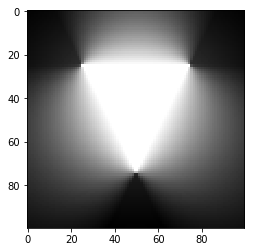

In [141]:
plt.imshow(results.reshape((100, 100)), interpolation=None, cmap="gray")